In [1]:
# PREPARATION
# data downloaded from https://land.copernicus.eu/pan-european/corine-land-cover/clc2018/fetch-land-file?hash=83684d24c50f069b613e0dc8e12529b893dc172f
# shapefile from http://www.diva-gis.org

#!pip install rasterio

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
import rasterio.mask
import numpy as np
import pandas as pd

from matplotlib import colors

In [2]:
# open CORINE geotiff
df = rasterio.open('./u2018_clc2018_v2020_20u1_raster100m/DATA/U2018_CLC2018_V2020_20u1.tif')
# open Netherlands boundaries
nl = gpd.read_file('shapes/NLD_adm0.shp').to_crs("epsg:3035")

In [14]:
# cropping Europe raster to Netherlands boundaries
out_image, out_transform = rasterio.mask.mask(df, nl["geometry"], crop=True,nodata=45)
out_meta = df.meta

In [15]:
# reading legend file
legend = pd.read_csv('./u2018_clc2018_v2020_20u1_raster100m/Legend/CLC2018_CLC2018_V2018_20_QGIS.txt',header=None)
legend.columns = ["Code","r","g","b","a","Landuse"]
legend.tail()

,Code,r,g,b,a,Landuse
40,512,128,242,230,255,Water bodies
41,521,0,255,166,255,Coastal lagoons
42,522,166,255,230,255,Estuaries
43,523,230,242,255,255,Sea and ocean
44,999,255,255,255,255,NODATA


In [16]:
# creating hex colors from RGB
legend['color'] = legend.apply(lambda r: colors.rgb2hex((r['r']/255,r['g']/255,r['b']/255)),axis=1)

In [17]:
# mapping raster values to colors with matplotlib custom colormap
cmap = colors.ListedColormap(legend['color'].tolist())
norm = colors.BoundaryNorm(np.linspace(0.5,45.5,45), cmap.N)

(-0.5, 2806.5, 3093.5, -0.5)

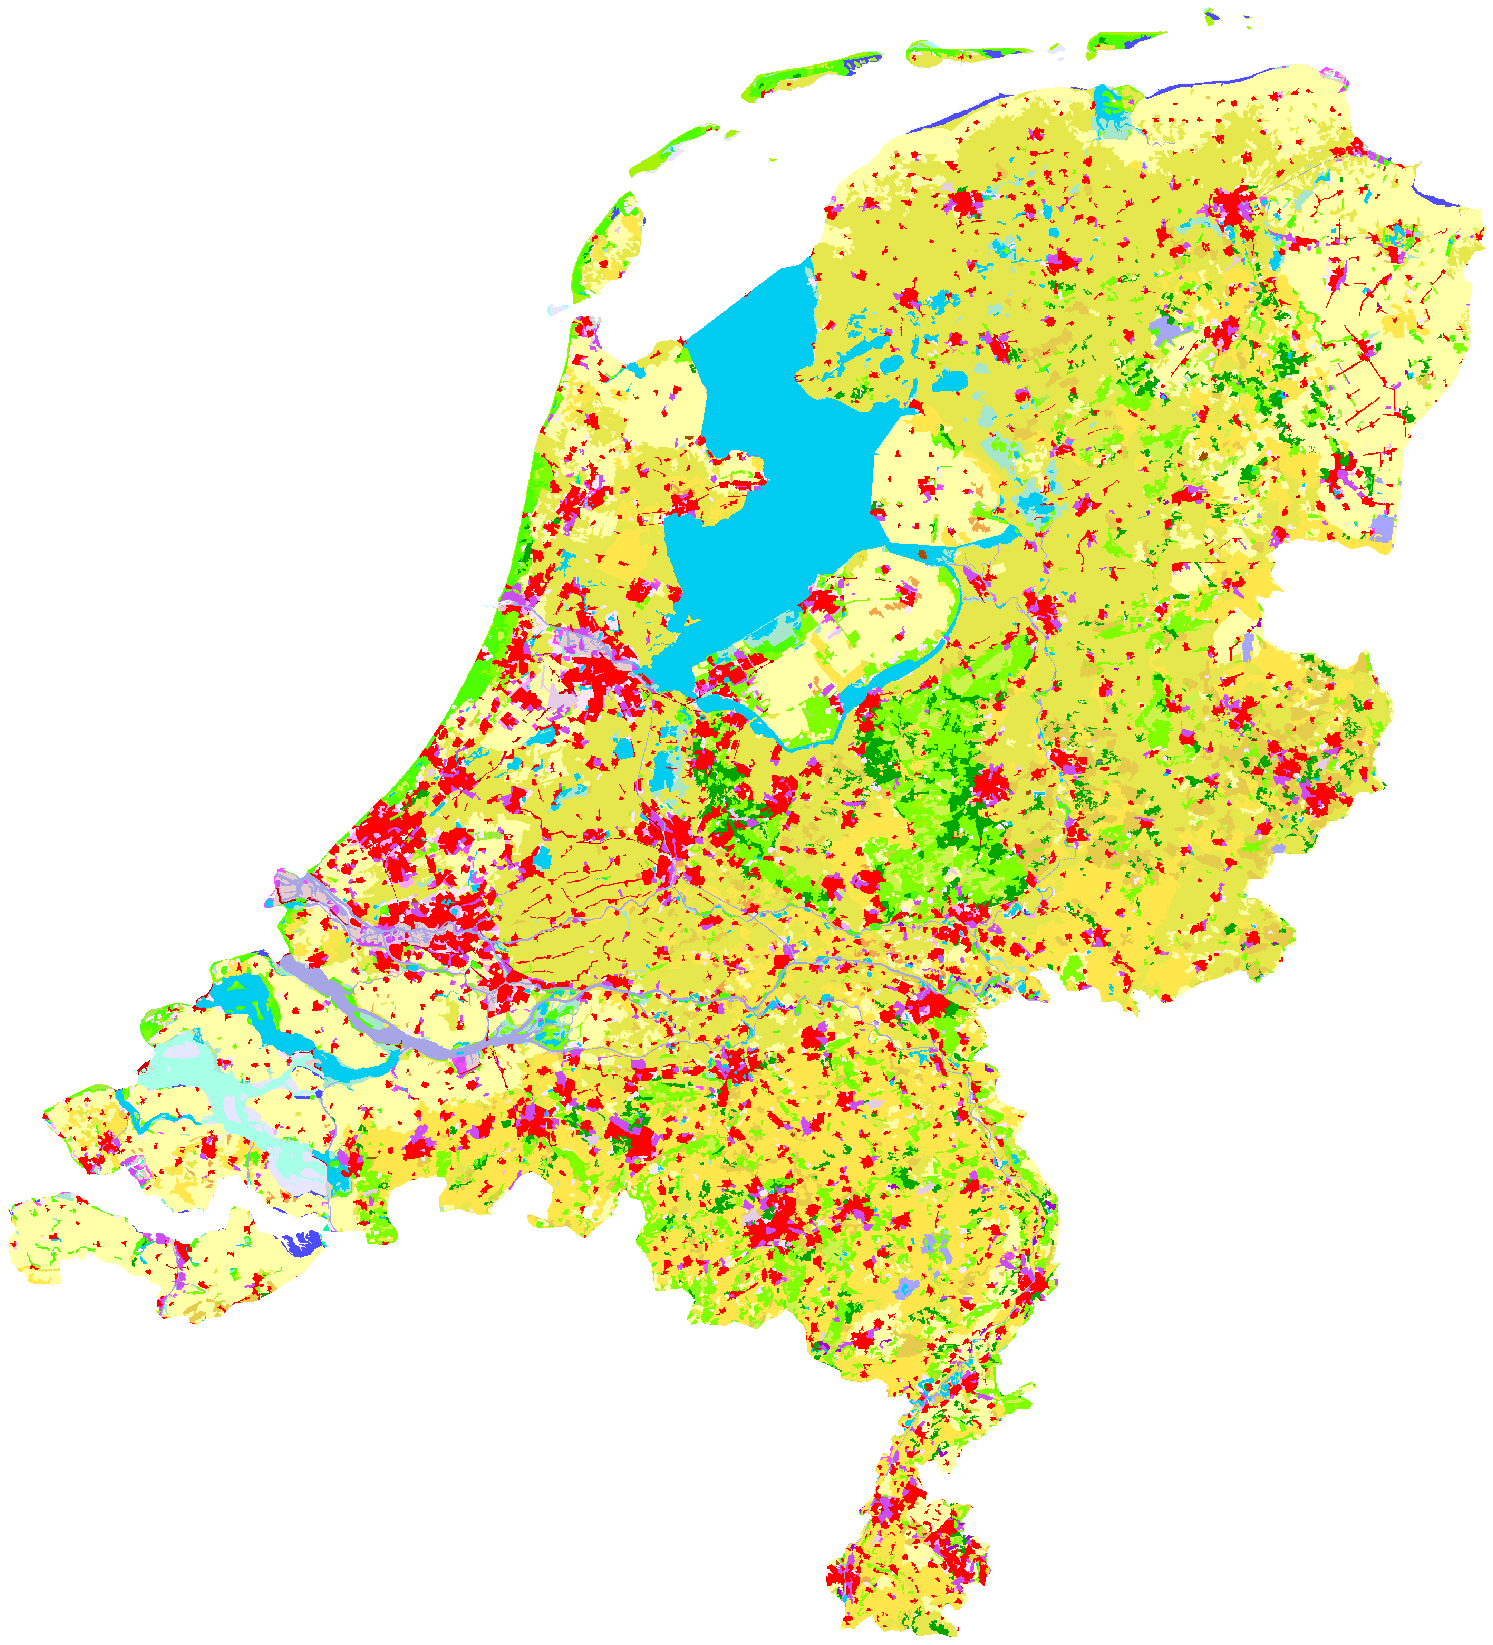

In [18]:
# drawing figure
plt.figure(figsize=(30,30))
plt.imshow(out_image[0,:,:],interpolation='none',cmap=cmap,norm=norm)
plt.axis('off')